## Asunciones Regresión Lineal
En esta lección aprenderemos que es un ANOVA y que asunciones deben cumplirse para hacer un análisis de este tipo.

Las asunciones cuando queramos trabajar con un ANOVA:

Sin embargo, no nos podemos poner a hacer nuestras operaciones a lo loco. Antes de hacer nada, tenemos que comprobar una serie de asunciones. ¿Cuáles son?

- Los datos deben ser normales -> test de normalidad
- Las variables deben ser independientes -> correlación
- Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad

In [11]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
import researchpy as rp
from scipy.stats import levene
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8) 

In [5]:
sales = pd.read_csv("../DA-PromoC-Modulo3-Sprint1-Lola-Noemi/ficheros/sales2.csv",index_col =0)
sales.sample(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
2905,715,Wisconsin,Central,Small Market,22.0,80.0,145.0,65.0,58.0,24.0,403.0,30.0,60.0,80.0,140.0,1,12/01/10 00:00:00,Coffee,Amaretto,Regular
2926,715,Wisconsin,Central,Small Market,77.0,103.0,187.0,86.0,44.0,26.0,1081.0,90.0,90.0,130.0,220.0,5,07/01/11 00:00:00,Espresso,Caffe Mocha,Regular


- Los datos deben ser normales -> test de normalidad

Analíticamente: Test Shapiro Para la variable respuesta: profit

In [6]:
stats.shapiro(sales['profit'])

ShapiroResult(statistic=0.9109626412391663, pvalue=1.8216880036222622e-44)

Visualmente: con qqplot 

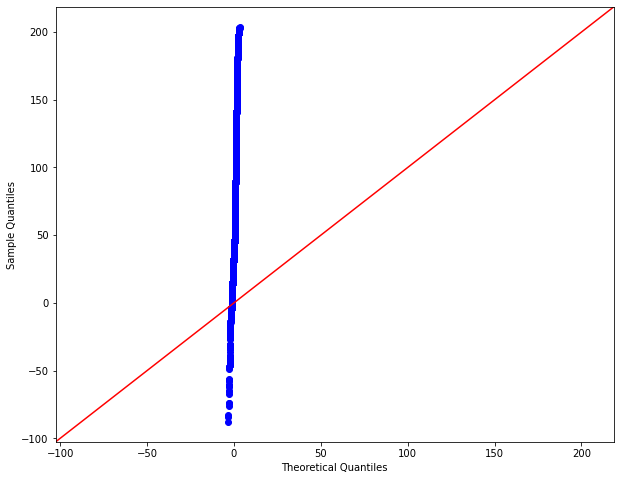

In [12]:
sm.qqplot(sales['profit'],line='45');

Como podemos observar , nuestra variable respuesta no tiene una distribución normal, ya que su p-value es inferior a 0.05 y gráficamente los datos no se ajustan a la recta.

- Las variables deben ser independientes -> correlación

Asunción de independencia para variables categóricas

In [20]:
crosstab, test_results, expected = rp.crosstab(sales["product_type"], sales["product"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")




In [22]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 36.0) =,12744.0
1,p-value =,0.0
2,Cramer's V =,1.0


Se observa que el p-value es 0, con lo cual podemos rechazar la H0 y son variables dependientes.

In [23]:
crosstab2, test_results2, expected2 = rp.crosstab(sales["state"], sales["product"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")



In [24]:
test_results2

,Chi-square test,results
0,Pearson Chi-square ( 228.0) =,2035.4665
1,p-value =,0.0000
2,Cramer's V =,0.1998


Se observa que el p-value es 0, con lo cual podemos rechazar la H0 y son variables dependientes.

Realizamos alguna pruebas para encontrar variables independientes.

In [74]:
crosstab3, test_results3, expected3 = rp.crosstab(sales["state"], sales["market_size"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [75]:
test_results3

,Chi-square test,results
0,Pearson Chi-square ( 19.0) =,4248.0
1,p-value =,0.0
2,Cramer's V =,1.0


In [66]:
crosstab4, test_results4, expected4 = rp.crosstab(sales["market_size"], sales["type"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")


In [67]:
test_results4

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,0.0293
1,p-value =,0.8640
2,Cramer's phi =,0.0026


- Homogeneidad de las varianzas o heterocedasticidad -> test de heterocedasticidad

In [38]:
sales.head(2)

,area_code,state,market,market_size,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_cogs,budget_margin,budget_sales,productid,date,product_type,product,type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular


Analíticamente: Test de Levene

In [77]:
sales['market_size'].unique()

array(['Small Market', 'Major Market'], dtype=object)

In [79]:
pequeño = sales[sales['market_size']=='Small Market']['profit']
grande = sales[sales['market_size']=='Major Market']['profit']

In [81]:
levene = stats.levene(pequeño,grande,center = 'median')
levene

LeveneResult(statistic=133.12518200568914, pvalue=2.3957370353372936e-30)

Este p-value menor de 0.05---> los datos son heterocidásticos. Tienen distinta varianza. Rechazar la H0

In [85]:
sales['type'].unique()

array(['Regular', 'Decaf'], dtype=object)

In [86]:
normal = sales[sales['type']=='Regular']['profit']
descafeinado = sales[sales['type']=='Decaf']['profit']

In [88]:
levene2 =stats.levene(normal,descafeinado,center = 'median')
levene2

LeveneResult(statistic=0.04799658825481825, pvalue=0.8265972967508308)

Nos devuelve como p-valor un valor mayor que 0.05, lo que nos indica que los datos son homocedásticos lo que significa que tienen la varianza similar.


Gráficamente realizamos un violinplot

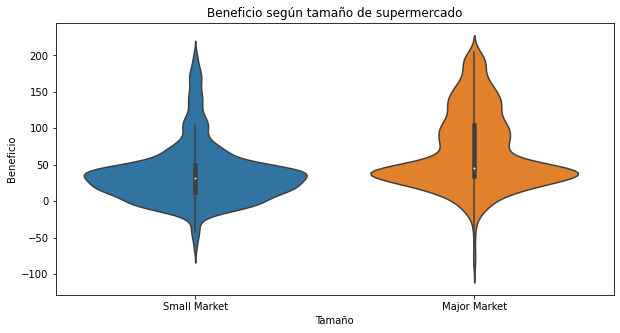

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))


sns.violinplot(
    x       = 'market_size',
    y       = 'profit',
    data    = sales,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Beneficio según tamaño de supermercado')
ax.set_ylabel('Beneficio')
ax.set_xlabel('Tamaño');


Interpretación: La mediana está a la misma altura. La dispersión es similar.

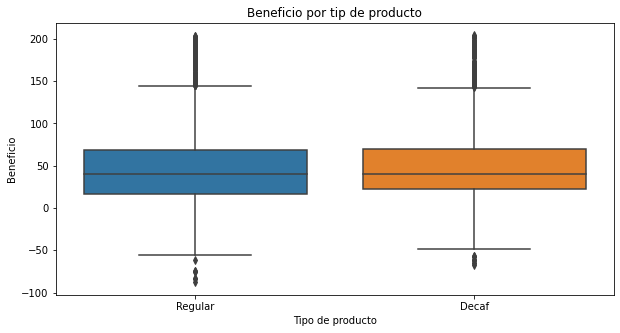

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))


sns.boxplot(
    x       = 'type',
    y       = 'profit',
    data    = sales,
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Beneficio por tip de producto')
ax.set_ylabel('Beneficio')
ax.set_xlabel('Tipo de producto');


La mediana está a la misma altura y la dispersión es similar. Los datos de ambas categorías devuelven resultado parecidos.